<h1 align="center">Volume 4: River Crossing.</h1>

    NAME
    Section #
    DATE

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from autograd import grad
from scipy import optimize
from scipy.interpolate import barycentric_interpolate

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [76]:
#got the equations from the lab spec
c = lambda x: (-7/10)*((x**2) -1)
a = lambda x: (1-c(x)**2)**(-1/2)

#The first function
def L(x, y, dy):
    #used (19.3) to get L
    return a(x)*np.sqrt(1+(a(x)**2)*(dy(x)**2))- (a(x)**2)*(c(x))*(dy(x))

#The second function
def T(y):
    #returning the integral from -1 to 1
    return integrate.quad(L, -1,1, args = (y,grad(y)))


In [77]:
# title and man matplotlib manipulations
# also put many information for better seeing.


# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [78]:
#get the euqation that connects A and B which is a line.
#calculated by hands
y = lambda x: (5/2)*(x+1)

#getting the upper and lower bounds
upper = T(y)[0]
#The lower bounds is the graph of 1/sec from -1 to 1. 
#Thus, it's the integral -1 to 1 with 1 dx which is 2.
lower = 2

print(upper, lower)

3.877082049138412 2


# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

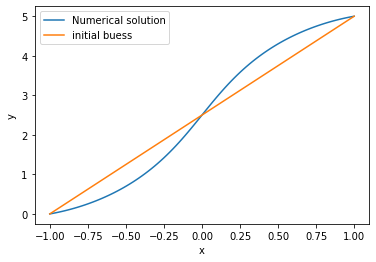

In [79]:
#got the equations from the lab spec
c = lambda x: (-7/10)*((x**2) -1)
a = lambda x: (1-c(x)**2)**(-1/2)
y = lambda x: (5/2)*(x+1)

def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

def F(U):
    #modify f
    f = D@((a(x)**3)*(D@U)*
           ((1+(a(x)**2)*((D@U)**2))**(-1/2))
           -((a(x)**2)*(c(x))))
    f[0] = U[0]-5
    f[-1] = U[-1]

    return f

#getting barycentric values
D, x = cheb(50) 
x_vals = np.linspace(-1,1,100)
guess = y(x)
solution = optimize.root(F, guess).x
barycentric = barycentric_interpolate(x, solution, x_vals)

#plotting
plt.plot(x_vals, barycentric,label = "Numerical solution")
plt.plot(x, guess,label = 'initial buess')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

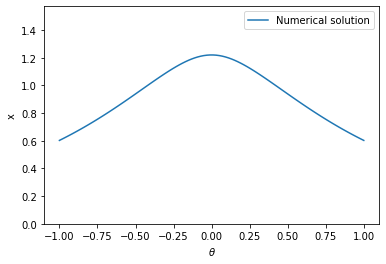

In [80]:
#got the equations from the lab spec
c = lambda x: (-7/10)*((x**2) -1)
a = lambda x: (1-c(x)**2)**(-1/2)
y = lambda x: (5/2)*(x+1)

#got this from spectral1 did not modify it
def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x
#got this from spectral1 and modified it
def F(U):
    #modify f
    f = D@solution -np.tan(U) -c(x)/np.cos(U)

    return f

#getting barycentric values
x_vals = np.linspace(-1,1,100)
guess = np.zeros(len(x))
solution = optimize.root(F, guess).x
barycentric = barycentric_interpolate(x, solution, x_vals)

#plotting
plt.plot(x_vals, barycentric,label = "Numerical solution")
plt.xlabel(r'$\theta$')
plt.ylabel(r'x')
plt.ylim(0,np.pi/2)
plt.legend()
plt.show()